# Information and plots about dataset

In [ ]:
# Importing packages needed
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Downloading Apple stock data using yfinance
apple_data = yf.download('AAPL', start='2023-01-01', end='2023-11-01')

# Printing head of the data
print(apple_data.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-03  130.279999  130.899994  124.169998  125.070000  124.374802   
2023-01-04  126.889999  128.660004  125.080002  126.360001  125.657639   
2023-01-05  127.129997  127.769997  124.760002  125.019997  124.325081   
2023-01-06  126.010002  130.289993  124.889999  129.619995  128.899521   
2023-01-09  130.470001  133.410004  129.889999  130.149994  129.426575   

               Volume  
Date                   
2023-01-03  112117500  
2023-01-04   89113600  
2023-01-05   80962700  
2023-01-06   87754700  
2023-01-09   70790800  


[*********************100%%**********************]  1 of 1 completed


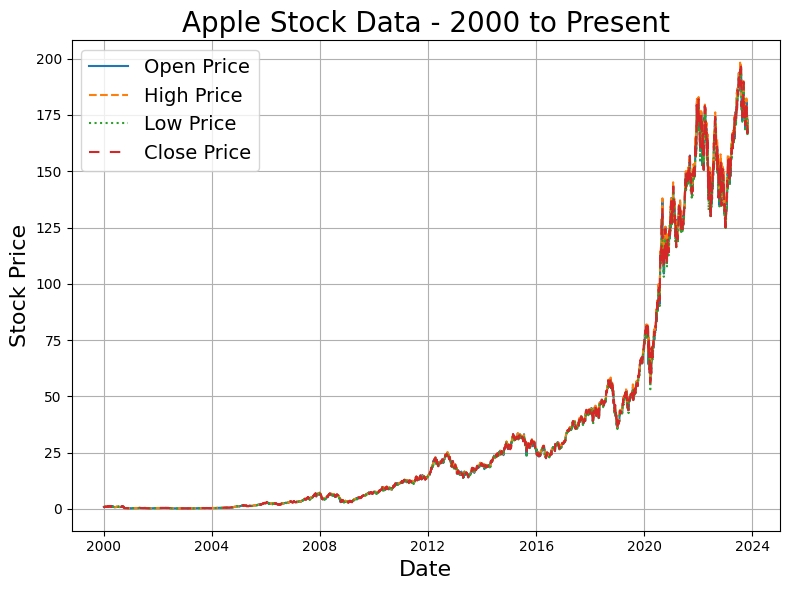

In [ ]:
# Importing packages needed
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Downloading Apple stock data using yfinance
apple_data = yf.download('AAPL', start='2000-01-01', end='2023-11-01')

# Creating a figure with one subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
epochs = 50

# Plotting each Apple stock data column on the subplot
axes.plot(apple_data['Open'], linestyle='solid', label='Open Price')
axes.plot(apple_data['High'], linestyle='dashed', label='High Price')
axes.plot(apple_data['Low'], linestyle='dotted', label='Low Price')
axes.plot(apple_data['Close'], linestyle=(0, (5, 5)), label='Close Price')
axes.set_title('Apple Stock Data - 2000 to Present', fontsize=20)
axes.set_xlabel('Date', fontsize=16)
axes.set_ylabel('Stock Price', fontsize=16)
axes.legend(fontsize=14)
axes.grid(True)

# Plotting the plots
plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


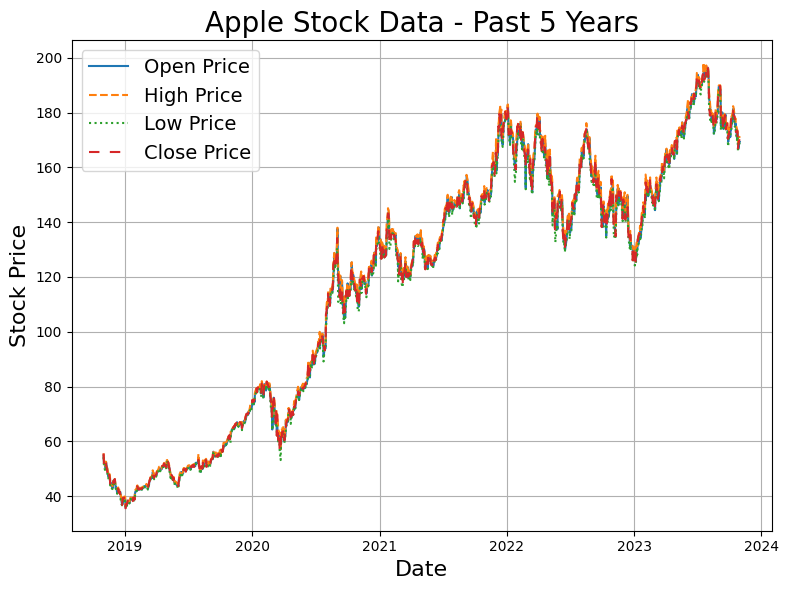

In [ ]:
# Downloading Apple stock data using yfinance
apple_data = yf.download('AAPL', start='2018-11-01', end='2023-11-01')

# Creating a figure with one subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
epochs = 50

# Plotting each Apple stock data column on the subplot
axes.plot(apple_data['Open'], linestyle='solid', label='Open Price')
axes.plot(apple_data['High'], linestyle='dashed', label='High Price')
axes.plot(apple_data['Low'], linestyle='dotted', label='Low Price')
axes.plot(apple_data['Close'], linestyle=(0, (5, 5)), label='Close Price')
axes.set_title('Apple Stock Data - Past 5 Years', fontsize=20)
axes.set_xlabel('Date', fontsize=16)
axes.set_ylabel('Stock Price', fontsize=16)
axes.legend(fontsize=14)
axes.grid(True)

# Plotting the plots
plt.tight_layout()
plt.show()

# RNN with normalised data

#### Getting the data, preprocessing, splitting

In [ ]:
# Importing packages needed
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, GRU, Dropout, Dense
import matplotlib.pyplot as plt
import yfinance as yf

# Downloading Apple stock data using yfinance
apple_data = yf.download('AAPL', start='2018-11-01', end='2023-11-01')

# Extracting the closing prices
apple_close = apple_data['Close']
apple_values = apple_close.values.reshape(-1, 1)

# Normalising the data
scaler = MinMaxScaler(feature_range=(0, 1))
apple_values_normalised = scaler.fit_transform(apple_values)

# Splitting the data into training, validation, and testing sets
train_size = int(len(apple_values_normalised) * 0.7)
val_size = int(len(apple_values_normalised) * 0.15)
test_size = len(apple_values_normalised) - train_size - val_size

train_data, val_data, test_data = (
    apple_values_normalised[:train_size, :],
    apple_values_normalised[train_size:train_size + val_size, :],
    apple_values_normalised[train_size + val_size:, :]
)

# Creating the X and y datasets
X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], []
for i in range(50, len(train_data)):
    X_train.append(train_data[i - 50:i][0])
    y_train.append(train_data[i][0])

for i in range(50, len(val_data)):
    X_val.append(val_data[i - 50:i][0])
    y_val.append(val_data[i][0])

for i in range(50, len(test_data) + 50):
    X_test.append(test_data[i - 50:i][0])
    # y_test.append(test_data[i][0])

# Converting the data to arrays and reshaping them
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val, y_val = np.array(X_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

[*********************100%%**********************]  1 of 1 completed


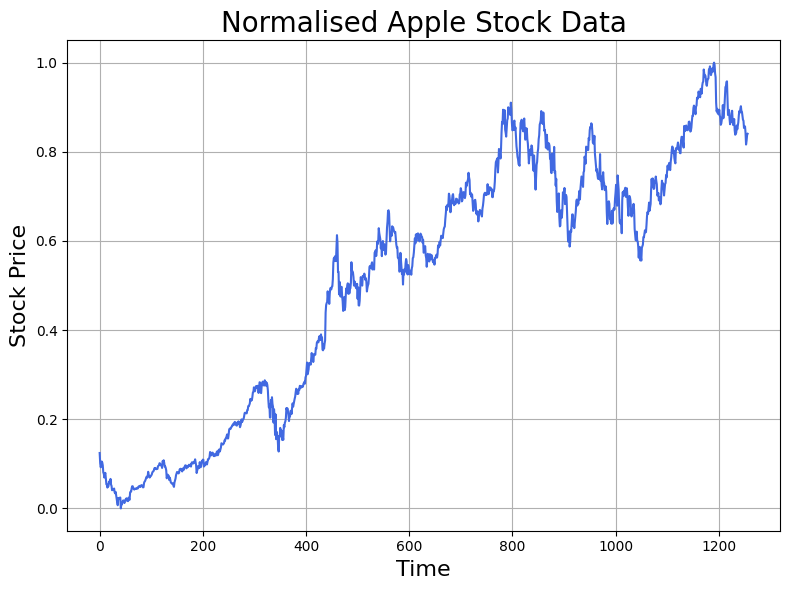

In [ ]:
# Creating a figure with one subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
epochs = 50

# Plotting stationary Apple stock data on the subplot
axes.plot(apple_values_normalised, color="royalblue")
axes.set_title('Normalised Apple Stock Data', fontsize=20)
axes.set_xlabel('Time', fontsize=16)
axes.set_ylabel('Stock Price', fontsize=16)
axes.grid(True)

# Plotting the plots
plt.tight_layout()
plt.show()

#### Creating the RNN model

In [ ]:
# Defining the simple RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(32, input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(8))
rnn_model.add(Dense(1))

# Compiling the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Training the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Storing training metrics
rnn_training_loss = rnn_history.history['loss']
rnn_validation_loss = rnn_history.history['val_loss']
rnn_training_mse = rnn_history.history['mse']
rnn_validation_mse = rnn_history.history['val_mse']
rnn_training_mae = rnn_history.history['mae']
rnn_validation_mae = rnn_history.history['val_mae']

# Testing the model on test data
rnn_predict = rnn_model.predict(X_test)

# Inverse normalising the predicted data
rnn_predict = scaler.inverse_transform(rnn_predict.reshape(-1,1))

Epoch 1/50
26/26 [==============================] - 2s 14ms/step - loss: 0.1144 - mse: 0.1144 - mae: 0.2453 - val_loss: 0.0087 - val_mse: 0.0087 - val_mae: 0.0821
Epoch 2/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.1136 - val_loss: 0.0089 - val_mse: 0.0089 - val_mae: 0.0732
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0787 - val_loss: 0.0091 - val_mse: 0.0091 - val_mae: 0.0820
Epoch 4/50
26/26 [==============================] - 0s 5ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0657 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0910
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0057 - mse: 0.0057 - mae: 0.0608 - val_loss: 0.0115 - val_mse: 0.0115 - val_mae: 0.0945
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0593 - val_loss: 0.0130 - val_mse: 0.0130 - val_mae: 0.1006
Epoch 7/50
26/26 [=========

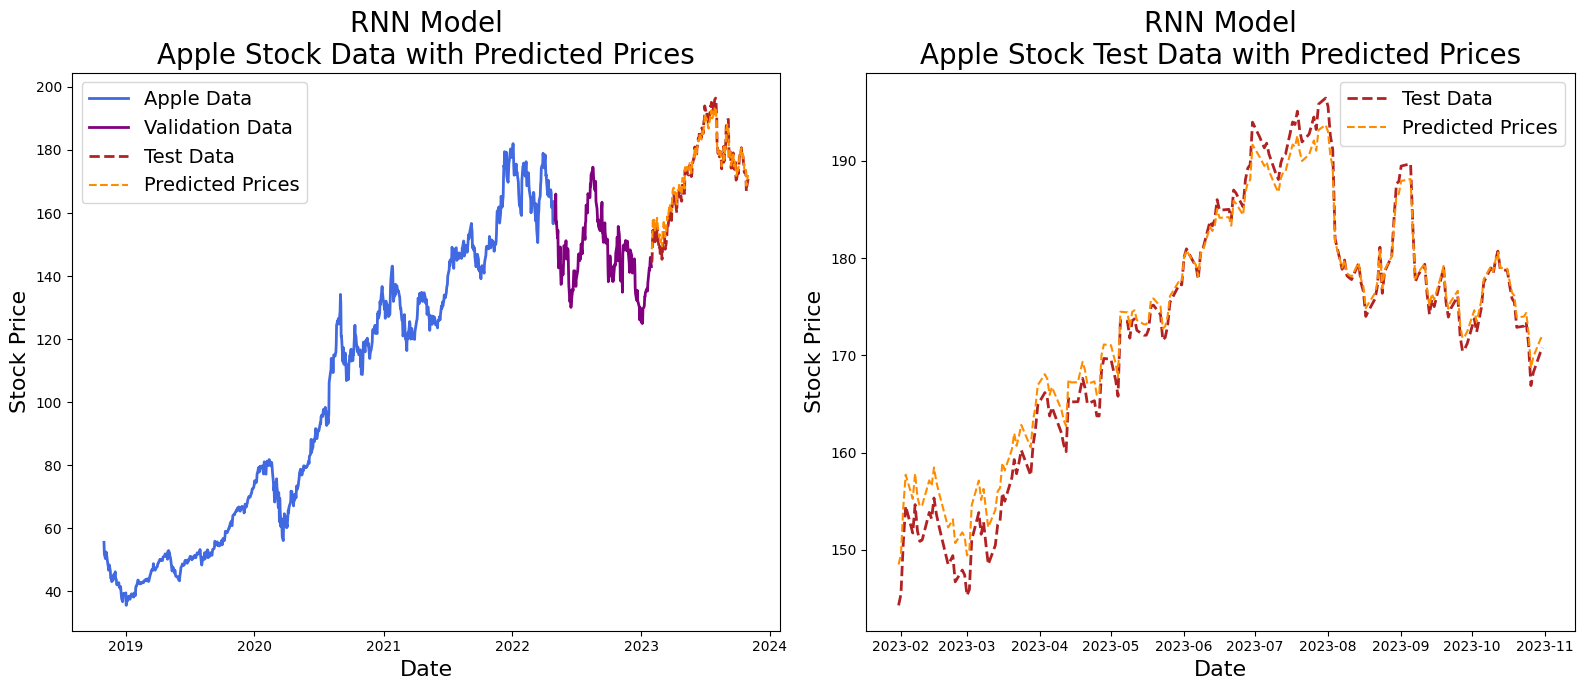

In [ ]:
# Creating subplots for each model in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Plotting all Apple stock data on the first subplot
axes[0].plot(apple_data.index[:train_size], apple_data['Close'][:train_size], color="royalblue", label='Apple Data', linewidth=2)
axes[0].plot(apple_data.index[train_size:train_size + val_size], apple_data['Close'][train_size:train_size + val_size], color="purple", label='Validation Data', linewidth=2)
axes[0].plot(apple_data.index[train_size + val_size:], apple_data['Close'][train_size + val_size:], color="firebrick", label='Test Data', linestyle='dashed', linewidth=2)
axes[0].plot(apple_data.index[train_size + val_size:], rnn_predict, label='Predicted Prices', linestyle='dashed', color="darkorange")
axes[0].set_title('RNN Model\nApple Stock Data with Predicted Prices', fontsize=20)
axes[0].set_xlabel('Date', fontsize=16)
axes[0].set_ylabel('Stock Price', fontsize=16)
axes[0].legend(fontsize=14)

# Plotting test and predicted stock data on the second subplot
axes[1].plot(apple_data.index[train_size + val_size:], apple_data['Close'][train_size + val_size:], color="firebrick", label='Test Data', linestyle='dashed', linewidth=2)
axes[1].plot(apple_data.index[train_size + val_size:], rnn_predict, label='Predicted Prices', linestyle='dashed', color='darkorange')
axes[1].set_title('RNN Model\nApple Stock Test Data with Predicted Prices', fontsize=20)
axes[1].set_xlabel('Date', fontsize=16)
axes[1].set_ylabel('Stock Price', fontsize=16)
axes[1].legend(fontsize=14)

# Plotting the plots
plt.tight_layout()
plt.show()

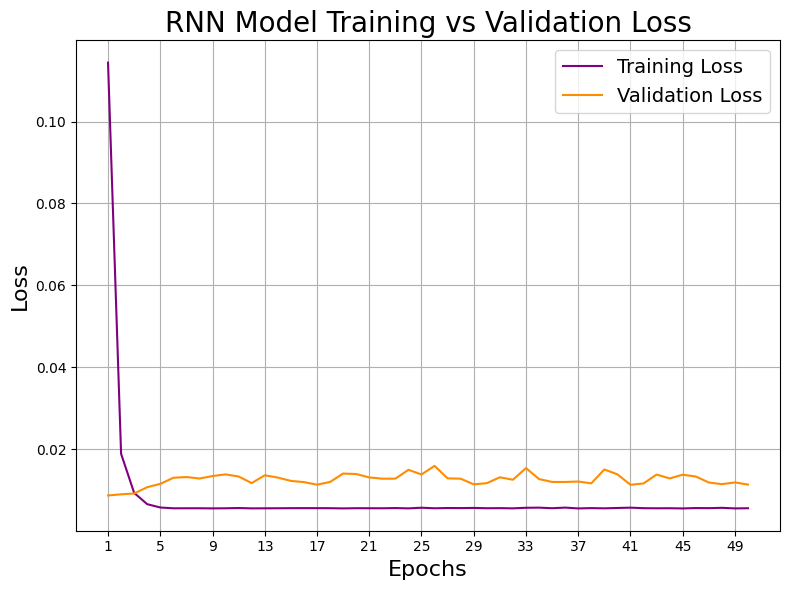

In [ ]:
# Creating a figure with one subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
epochs = 50

# Plotting loss against epochs on the subplot
axes.plot(rnn_training_loss, color="purple", label='Training Loss')
axes.plot(rnn_validation_loss, color="darkorange", label='Validation Loss')
axes.set_title('RNN Model Training vs Validation Loss', fontsize=20)
axes.set_xlabel('Epochs', fontsize=16)
axes.set_ylabel('Loss', fontsize=16)
axes.legend(fontsize=14)
xticks = np.arange(0, epochs+1, 4)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks+1)
axes.grid(True)

# Plotting the plots
plt.tight_layout()
plt.show()

In [ ]:
# Importing packages needed
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculating RSME and MAPE metrics
train_val_split = len(apple_values)-test_size
rnn_error = mean_absolute_percentage_error(apple_values[train_val_split:], rnn_predict)
rnn_rmse = math.sqrt(mean_squared_error(apple_values[train_val_split:], rnn_predict))
print(rnn_error, rnn_rmse)

# Calculating correctly predicted days
rnn_day_count = 0
for day in range(len(rnn_predict)):
  if apple_values[train_val_split + day] > apple_values[train_val_split + day-1] and rnn_predict[day] > rnn_predict[day - 1]:
    rnn_day_count += 1
  elif apple_values[train_val_split + day] < apple_values[train_val_split + day-1] and rnn_predict[day] < rnn_predict[day - 1]:
    rnn_day_count += 1
  elif apple_values[train_val_split + day] == apple_values[train_val_split + day-1] and rnn_predict[day] == rnn_predict[day - 1]:
    rnn_day_count += 1

# Printing the calculated metrics
print(rnn_day_count/len(rnn_predict) * 100)

0.029320314179893378 5.0774224465151505
99.47368421052632


# LSTM with normalised data

In [ ]:
# Defining the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(100, return_sequences=True))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

# Compiling the model
lstm_model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse', 'mae'])

# Training the model
lstm_history = lstm_model.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_data=(X_val, y_val))

# Storing training metrics
lstm_training_loss = lstm_history.history['loss']
lstm_validation_loss = lstm_history.history['val_loss']
lstm_training_mse = lstm_history.history['mse']
lstm_validation_mse = lstm_history.history['val_mse']
lstm_training_mae = lstm_history.history['mae']
lstm_validation_mae = lstm_history.history['val_mae']

Epoch 1/50
26/26 [==============================] - 4s 35ms/step - loss: 0.1698 - accuracy: 0.0000e+00 - val_loss: 0.1953 - val_accuracy: 0.0000e+00
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0614 - accuracy: 0.0000e+00 - val_loss: 0.0414 - val_accuracy: 0.0000e+00
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0333 - accuracy: 0.0000e+00 - val_loss: 0.0171 - val_accuracy: 0.0000e+00
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0273 - accuracy: 0.0000e+00 - val_loss: 0.0157 - val_accuracy: 0.0000e+00
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0211 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0157 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.0000e+00 - val_los

6/6 [==============================] - 0s 2ms/step


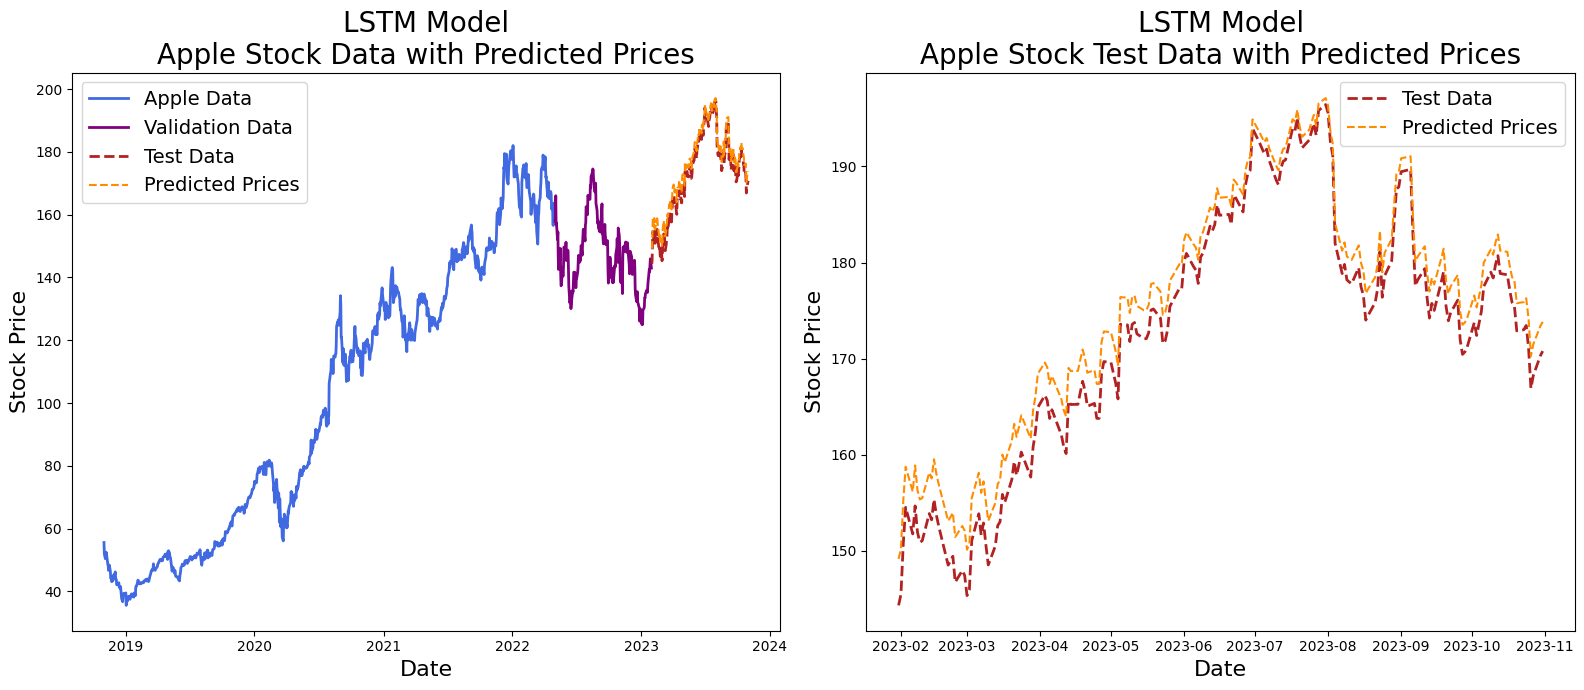

In [ ]:
# Testing the model on test data
lstm_predict  = lstm_model.predict(X_test)

# Inverse normalising the predicted data
lstm_predict = scaler.inverse_transform(lstm_predict)

# Creating subplots for each model in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Plotting all Apple stock data on the first subplot
axes[0].plot(apple_data.index[:train_size], apple_data['Close'][:train_size], color="royalblue", label='Apple Data', linewidth=2)
axes[0].plot(apple_data.index[train_size:train_size + val_size], apple_data['Close'][train_size:train_size + val_size], color="purple", label='Validation Data', linewidth=2)
axes[0].plot(apple_data.index[train_size + val_size:], apple_data['Close'][train_size + val_size:], color="firebrick", label='Test Data', linestyle='dashed', linewidth=2)
axes[0].plot(apple_data.index[train_size + val_size:], lstm_predict, label='Predicted Prices', linestyle='dashed', color="darkorange")
axes[0].set_title('LSTM Model\nApple Stock Data with Predicted Prices', fontsize=20)
axes[0].set_xlabel('Date', fontsize=16)
axes[0].set_ylabel('Stock Price', fontsize=16)
axes[0].legend(fontsize=14)

# Plotting test and predicted stock data on the second subplot
axes[1].plot(apple_data.index[train_size + val_size:], apple_data['Close'][train_size + val_size:], color="firebrick", label='Test Data', linestyle='dashed', linewidth=2)
axes[1].plot(apple_data.index[train_size + val_size:], lstm_predict, label='Predicted Prices', linestyle='dashed', color='darkorange')
axes[1].set_title('LSTM Model\nApple Stock Test Data with Predicted Prices', fontsize=20)
axes[1].set_xlabel('Date', fontsize=16)
axes[1].set_ylabel('Stock Price', fontsize=16)
axes[1].legend(fontsize=14)

# Plotting the plots
plt.tight_layout()
plt.show()

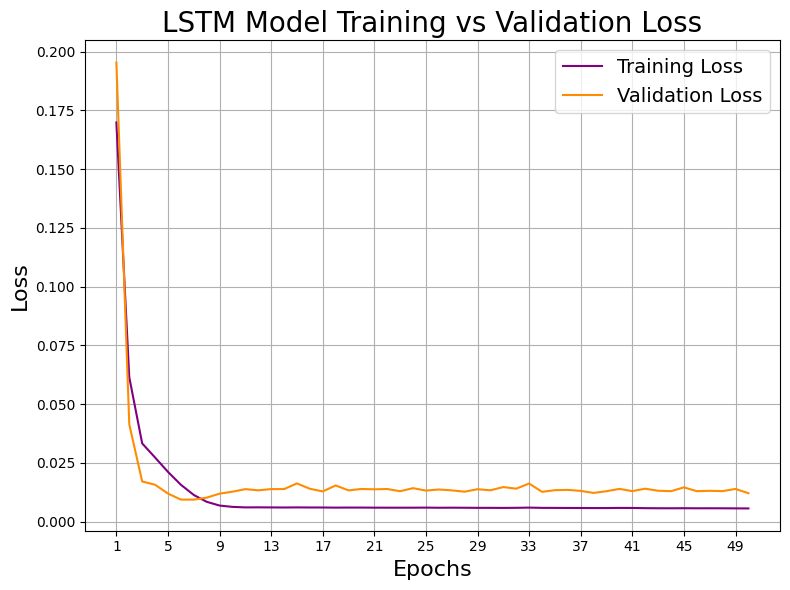

In [ ]:
# Creating a figure with one subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
epochs = 50

# Plotting loss against epochs on the subplot
axes.plot(lstm_training_loss, color="purple", label='Training Loss')
axes.plot(lstm_validation_loss, color="darkorange", label='Validation Loss')
axes.set_title('LSTM Model Training vs Validation Loss', fontsize=20)
axes.set_xlabel('Epochs', fontsize=16)
axes.set_ylabel('Loss', fontsize=16)
axes.legend(fontsize=14)
xticks = np.arange(0, epochs+1, 4)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks+1)
axes.grid(True)

# Plotting the plots
plt.tight_layout()
plt.show()

In [ ]:
# Importing packages needed
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculating RSME and MAPE metrics
train_val_split = len(apple_values)-test_size
lstm_error = mean_absolute_percentage_error(apple_values[train_val_split:], lstm_predict)
lstm_rmse = math.sqrt(mean_squared_error(apple_values[train_val_split:], lstm_predict))
print(lstm_error, lstm_rmse)

# Calculating correctly predicted days
lstm_day_count = 0
for day in range(len(lstm_predict)):
  if apple_values[train_val_split + day] > apple_values[train_val_split + day-1] and lstm_predict[day] > lstm_predict[day - 1]:
    lstm_day_count += 1
  elif apple_values[train_val_split + day] < apple_values[train_val_split + day-1] and lstm_predict[day] < lstm_predict[day - 1]:
    lstm_day_count += 1
  elif apple_values[train_val_split + day] == apple_values[train_val_split + day-1] and lstm_predict[day] == lstm_predict[day - 1]:
    lstm_day_count += 1

# Printing the calculated metrics
print(lstm_day_count/len(lstm_predict) * 100)

0.01699011627389315 3.0244527437267044
99.47368421052632


# GRU with normalised data

In [ ]:
# Defining the GRU model
gru_model = Sequential()
gru_model.add(GRU(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(100, return_sequences=True))
gru_model.add(GRU(100))
gru_model.add(Dense(25))
gru_model.add(Dense(1))

# Compiling the model
gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Training the model
gru_history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Storing training metrics
gru_training_loss = gru_history.history['loss']
gru_validation_loss = gru_history.history['val_loss']
gru_training_mse = gru_history.history['mse']
gru_validation_mse = gru_history.history['val_mse']
gru_training_mae = gru_history.history['mae']
gru_validation_mae = gru_history.history['val_mae']

# Testing the model on test data
gru_predict = gru_model.predict(X_test)

# Inverse normalising the predicted data
gru_predict = scaler.inverse_transform(gru_predict)

Epoch 1/50
26/26 [==============================] - 4s 30ms/step - loss: 0.1172 - accuracy: 0.0000e+00 - val_loss: 0.0489 - val_accuracy: 0.0000e+00
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 0.0000e+00 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0201 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 4/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0133 - accuracy: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0065 - accuracy: 0.0000e+00 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 7/50
26/26 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 0.0000e+00 - val_los

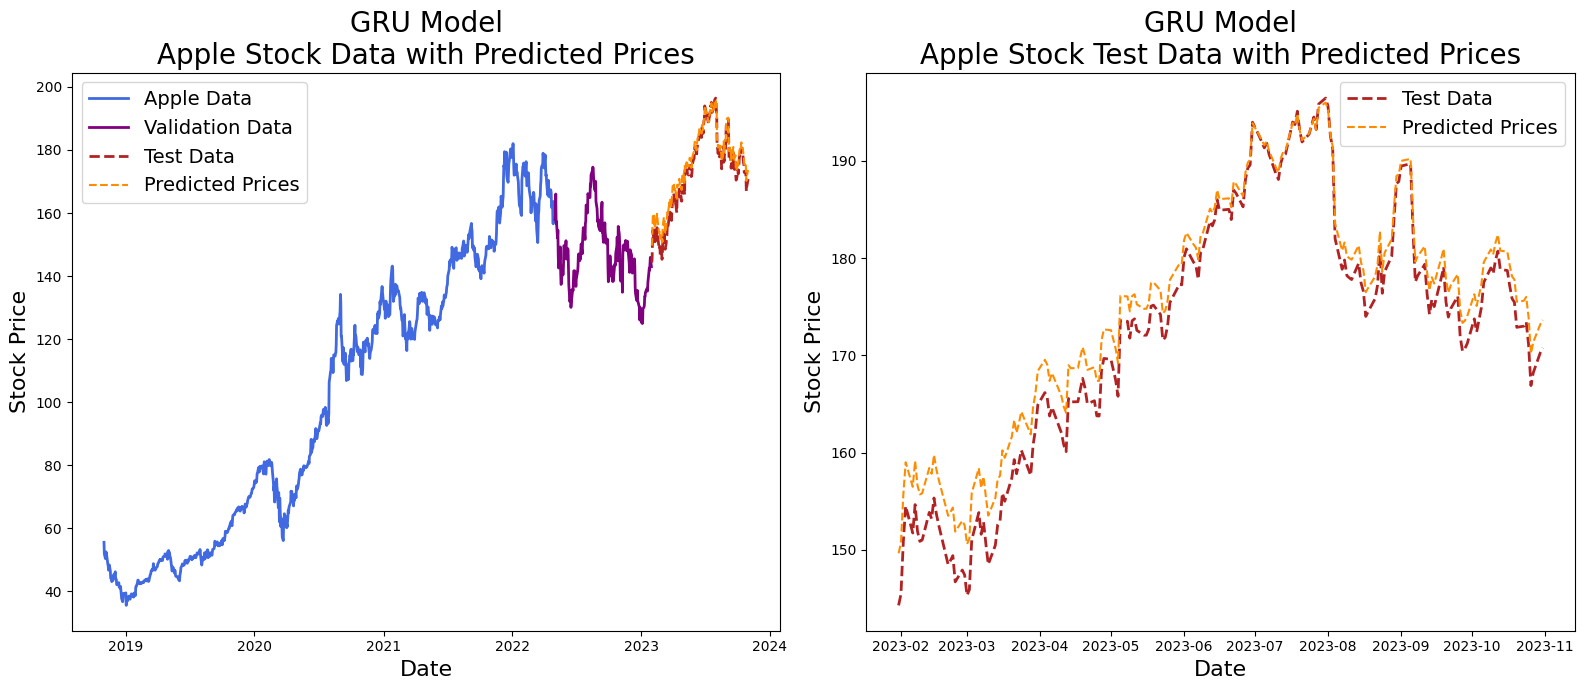

In [ ]:
# Creating subplots for each model in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Plotting all Apple stock data on the first subplot
axes[0].plot(apple_data.index[:train_size], apple_data['Close'][:train_size], color="royalblue", label='Apple Data', linewidth=2)
axes[0].plot(apple_data.index[train_size:train_size + val_size], apple_data['Close'][train_size:train_size + val_size], color="purple", label='Validation Data', linewidth=2)
axes[0].plot(apple_data.index[train_size + val_size:], apple_data['Close'][train_size + val_size:], color="firebrick", label='Test Data', linestyle='dashed', linewidth=2)
axes[0].plot(apple_data.index[train_size + val_size:], gru_predict, label='Predicted Prices', linestyle='dashed', color="darkorange")
axes[0].set_title('GRU Model\nApple Stock Data with Predicted Prices', fontsize=20)
axes[0].set_xlabel('Date', fontsize=16)
axes[0].set_ylabel('Stock Price', fontsize=16)
axes[0].legend(fontsize=14)

# Plotting test and predicted stock data on the second subplot
axes[1].plot(apple_data.index[train_size + val_size:], apple_data['Close'][train_size + val_size:], color="firebrick", label='Test Data', linestyle='dashed', linewidth=2)
axes[1].plot(apple_data.index[train_size + val_size:], gru_predict, label='Predicted Prices', linestyle='dashed', color='darkorange')
axes[1].set_title('GRU Model\nApple Stock Test Data with Predicted Prices', fontsize=20)
axes[1].set_xlabel('Date', fontsize=16)
axes[1].set_ylabel('Stock Price', fontsize=16)
axes[1].legend(fontsize=14)

# Plotting the plots
plt.tight_layout()
plt.show()

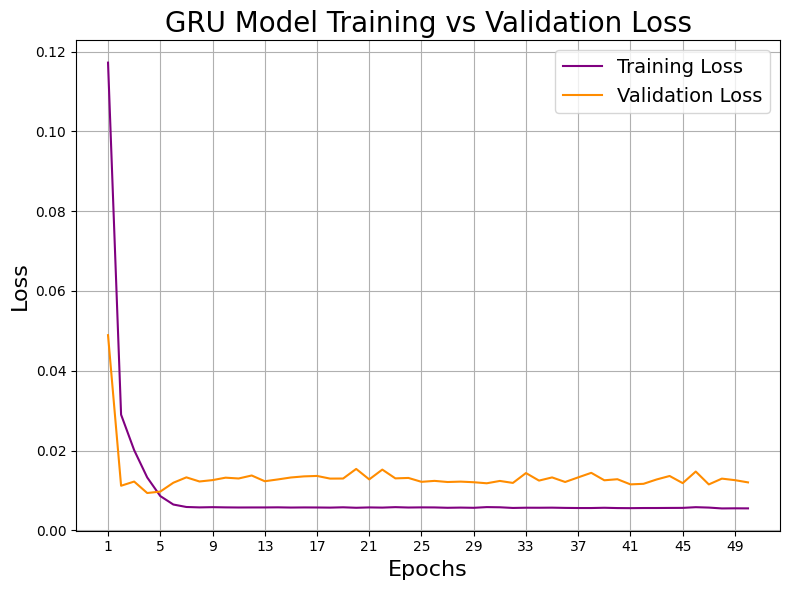

In [ ]:
# Creating a figure with one subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
epochs = 50

# Plotting loss against epochs on the subplot
axes.plot(gru_training_loss, color="purple", label='Training Loss')
axes.plot(gru_validation_loss, color="darkorange", label='Validation Loss')
axes.set_title('GRU Model Training vs Validation Loss', fontsize=20)
axes.set_xlabel('Epochs', fontsize=16)
axes.set_ylabel('Loss', fontsize=16)
axes.legend(fontsize=14)
xticks = np.arange(0, epochs+1, 4)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks+1)
axes.grid(True)

# Plotting the plots
plt.tight_layout()
plt.show()

In [ ]:
# Importing packages needed
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculating RSME and MAPE metrics
train_val_split = len(apple_values)-test_size
gru_error = mean_absolute_percentage_error(apple_values[train_val_split:], gru_predict)
gru_rmse = math.sqrt(mean_squared_error(apple_values[train_val_split:], gru_predict))
print(gru_error, gru_rmse)

# Calculating correctly predicted days
gru_day_count = 0
for day in range(len(gru_predict)):
  if apple_values[train_val_split + day] > apple_values[train_val_split + day-1] and gru_predict[day] > gru_predict[day - 1]:
    gru_day_count += 1
  elif apple_values[train_val_split + day] < apple_values[train_val_split + day-1] and gru_predict[day] < gru_predict[day - 1]:
    gru_day_count += 1
  elif apple_values[train_val_split + day] == apple_values[train_val_split + day-1] and gru_predict[day] == gru_predict[day - 1]:
    gru_day_count += 1

# Printing the calculated metrics
print(gru_day_count/len(gru_predict) * 100)

0.015644724154116066 2.954410459341996
99.47368421052632


# LSTM with normalised, stationary data

In [ ]:
# Importing packages needed
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import matplotlib.pyplot as plt
import yfinance as yf

# Downloading Apple stock data using yfinance
apple_data = yf.download('AAPL', start='2018-11-01', end='2023-11-01')

# Extracting the closing prices
apple_close = apple_data['Close']
apple_values = apple_close.values.reshape(-1,1)

# Normalising the data
scaler = MinMaxScaler(feature_range=(0, 1))
apple_values_normalised_new = scaler.fit_transform(apple_values)

# Addding a small constant value to avoid zero or negative values
constant = 0.1
apple_values_normalised_new = apple_values_normalised_new + 0.5

# Creating the stationary data
apple_values_stationary = np.diff(np.log(apple_values_normalised_new), axis=0) * 100

# Splitting the data into training, validation, and testing sets
train_size = int(len(apple_values_stationary) * 0.7)
val_size = int(len(apple_values_stationary) * 0.15)
test_size = len(apple_values_stationary) - train_size - val_size

train_data, val_data, test_data = (
    apple_values_stationary[:train_size],
    apple_values_stationary[train_size:train_size + val_size],
    apple_values_stationary[train_size + val_size:])

# Creating the X and y datasets
X_train_stat, y_train_stat, X_val_stat, y_val_stat, X_test_stat, y_test_stat = [], [], [], [], [], []
for i in range(50, len(train_data)):
    X_train_stat.append(train_data[i-50:i][0])
    y_train_stat.append(train_data[i][0])
for i in range(50, len(val_data)):
    X_val_stat.append(val_data[i-50:i][0])
    y_val_stat.append(val_data[i][0])
for i in range(50, len(test_data)+50):
    X_test_stat.append(test_data[i-50:i][0])
    ''' y_test_stat.append(test_data[i][0]) '''

# Converting the data to arrays and reshaping them
X_train_stat, y_train_stat = np.array(X_train_stat), np.array(y_train_stat)
X_train_stat = np.reshape(X_train_stat, (X_train_stat.shape[0], X_train_stat.shape[1], 1))
X_val_stat, y_val_stat = np.array(X_val_stat), np.array(y_val_stat)
X_val_stat = np.reshape(X_val_stat, (X_val_stat.shape[0], X_val_stat.shape[1], 1))
X_test_stat, y_test_stat = np.array(X_test_stat), np.array(y_test_stat)
X_test_stat = np.reshape(X_test_stat, (X_test_stat.shape[0], X_test_stat.shape[1], 1))

[*********************100%%**********************]  1 of 1 completed


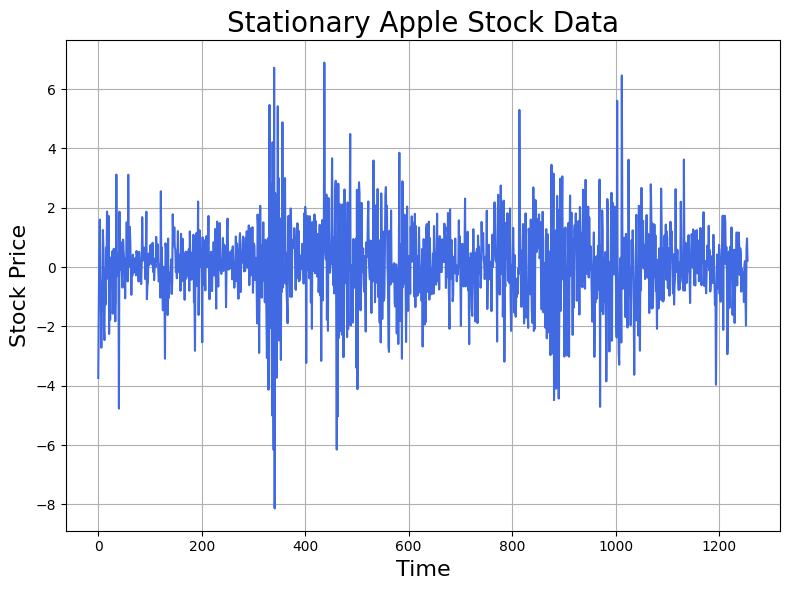

In [ ]:
# Creating a figure with one subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
epochs = 50

# Plotting stationary Apple stock data on the subplot
axes.plot(apple_values_stationary, color="royalblue")
axes.set_title('Stationary Apple Stock Data', fontsize=20)
axes.set_xlabel('Time', fontsize=16)
axes.set_ylabel('Stock Price', fontsize=16)
axes.grid(True)

# Plotting the plots
plt.tight_layout()
plt.show()

In [ ]:
# Importing packages needed
from keras import backend as K
from keras.utils import get_custom_objects
from keras.layers import Activation

# Defining custom tabh activation class
class Double_Tanh(Activation):
    def __init__(self, activation, **kwargs):
        super(Double_Tanh, self).__init__(activation, **kwargs)
        self.__name__ = 'double_tanh'

# Creating double tanh function to use
def double_tanh(x):
    return (K.tanh(x) * 2)

# Making the custom activation function real
get_custom_objects().update({'double_tanh':Double_Tanh(double_tanh)})

In [ ]:
# Defining the updated LSTM 2.0 model
lstm_model_2 = Sequential()
lstm_model_2.add(LSTM(32, input_shape=(X_train_stat.shape[1], 1)))
lstm_model_2.add(Dropout(0.2))
lstm_model_2.add(Dense(8))
lstm_model_2.add(Dense(1))
# Adding the custom activation function
lstm_model_2.add(Activation(double_tanh))

# Compiling the model
lstm_model_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mse', 'mae'])

# Training the model
lstm_history_2 = lstm_model_2.fit(X_train_stat, y_train_stat, epochs = 50, batch_size = 32, validation_data=(X_val_stat, y_val_stat))

# Storing training metrics
lstm_training_loss_2 = lstm_history_2.history['loss']
lstm_validation_loss_2 = lstm_history_2.history['val_loss']
lstm_training_mse_2 = lstm_history_2.history['mse']
lstm_validation_mse_2 = lstm_history_2.history['val_mse']
lstm_training_mae_2 = lstm_history_2.history['mae']
lstm_validation_mae_2 = lstm_history_2.history['val_mae']

Epoch 1/50
26/26 [==============================] - 3s 24ms/step - loss: 1.9750 - mse: 1.9750 - mae: 0.9886 - val_loss: 2.8309 - val_mse: 2.8309 - val_mae: 1.2754
Epoch 2/50
26/26 [==============================] - 0s 4ms/step - loss: 1.9521 - mse: 1.9521 - mae: 0.9847 - val_loss: 2.8396 - val_mse: 2.8396 - val_mae: 1.2793
Epoch 3/50
26/26 [==============================] - 0s 4ms/step - loss: 1.9551 - mse: 1.9551 - mae: 0.9856 - val_loss: 2.8374 - val_mse: 2.8374 - val_mae: 1.2787
Epoch 4/50
26/26 [==============================] - 0s 5ms/step - loss: 1.9560 - mse: 1.9560 - mae: 0.9836 - val_loss: 2.8329 - val_mse: 2.8329 - val_mae: 1.2780
Epoch 5/50
26/26 [==============================] - 0s 4ms/step - loss: 1.9568 - mse: 1.9568 - mae: 0.9867 - val_loss: 2.8316 - val_mse: 2.8316 - val_mae: 1.2778
Epoch 6/50
26/26 [==============================] - 0s 4ms/step - loss: 1.9551 - mse: 1.9551 - mae: 0.9841 - val_loss: 2.8422 - val_mse: 2.8422 - val_mae: 1.2815
Epoch 7/50
26/26 [=========

6/6 [==============================] - 3s 3ms/step


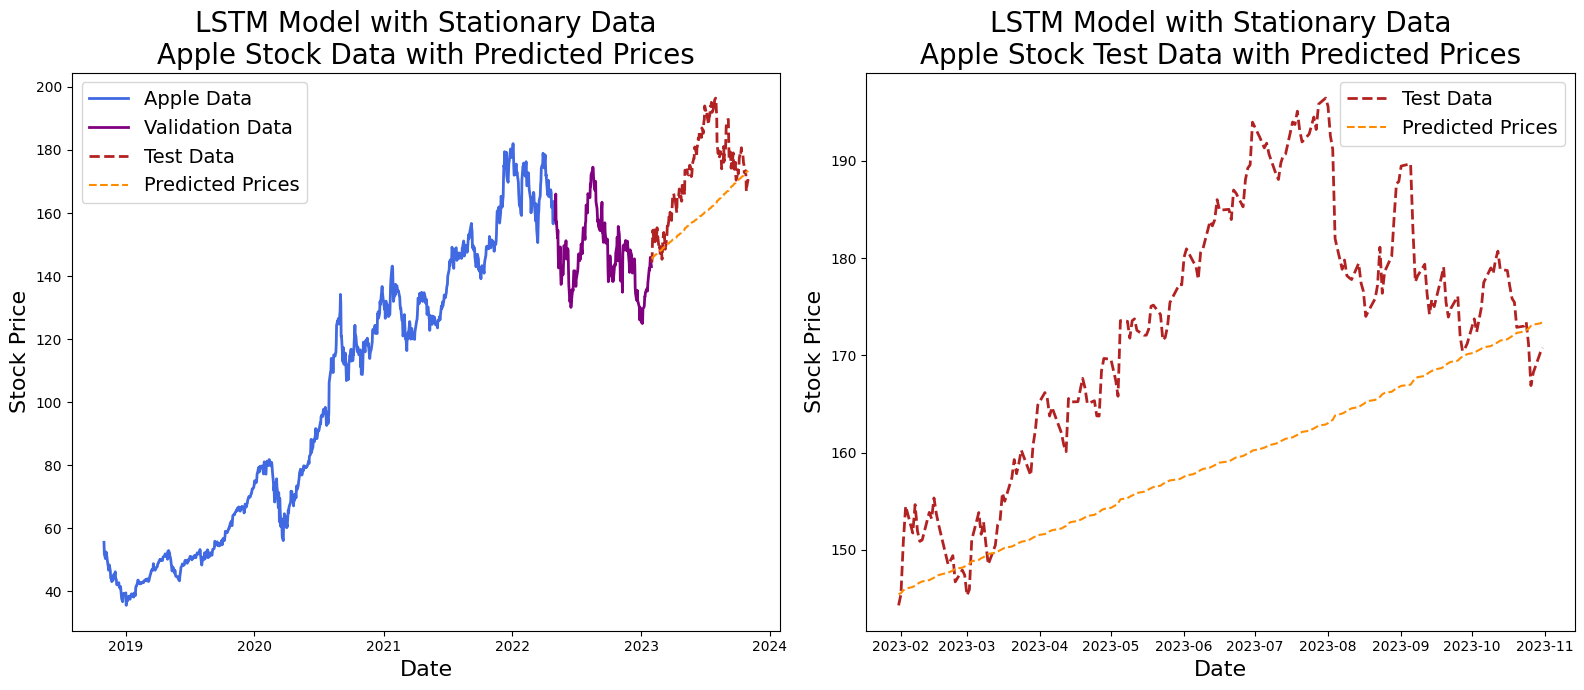

In [ ]:
# Testing the model on test data
lstm_predict_stationary = lstm_model_2.predict(X_test_stat)

# Reversing the stationary transformation
lstm_predict_2 = np.exp(np.concatenate(([lstm_predict_stationary[0]], lstm_predict_stationary)).cumsum(axis=0)/100) * apple_values[-test_size] - constant

# Creating subplots for each model in a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.subplots_adjust(hspace=0.5)
axes = axes.flatten()

# Plotting all Apple stock data on the first subplot
axes[0].plot(apple_data.index[:train_size], apple_data['Close'][:train_size], color="royalblue", label='Apple Data', linewidth=2)
axes[0].plot(apple_data.index[train_size:train_size + val_size], apple_data['Close'][train_size:train_size + val_size], color="purple", label='Validation Data', linewidth=2)
axes[0].plot(apple_data.index[train_size + val_size:], apple_data['Close'][train_size + val_size:], color="firebrick", label='Test Data', linestyle='dashed', linewidth=2)
axes[0].plot(apple_data.index[train_size + val_size:], lstm_predict_2, label='Predicted Prices', linestyle='dashed', color="darkorange")
axes[0].set_title('LSTM Model with Stationary Data\nApple Stock Data with Predicted Prices', fontsize=20)
axes[0].set_xlabel('Date', fontsize=16)
axes[0].set_ylabel('Stock Price', fontsize=16)
axes[0].legend(fontsize=14)

# Plotting test and predicted stock data on the second subplot
axes[1].plot(apple_data.index[train_size + val_size:], apple_data['Close'][train_size + val_size:], color="firebrick", label='Test Data', linestyle='dashed', linewidth=2)
axes[1].plot(apple_data.index[train_size + val_size:], lstm_predict_2, label='Predicted Prices', linestyle='dashed', color='darkorange')
axes[1].set_title('LSTM Model with Stationary Data\nApple Stock Test Data with Predicted Prices', fontsize=20)
axes[1].set_xlabel('Date', fontsize=16)
axes[1].set_ylabel('Stock Price', fontsize=16)
axes[1].legend(fontsize=14)

# Plotting the plots
plt.tight_layout()
plt.show()

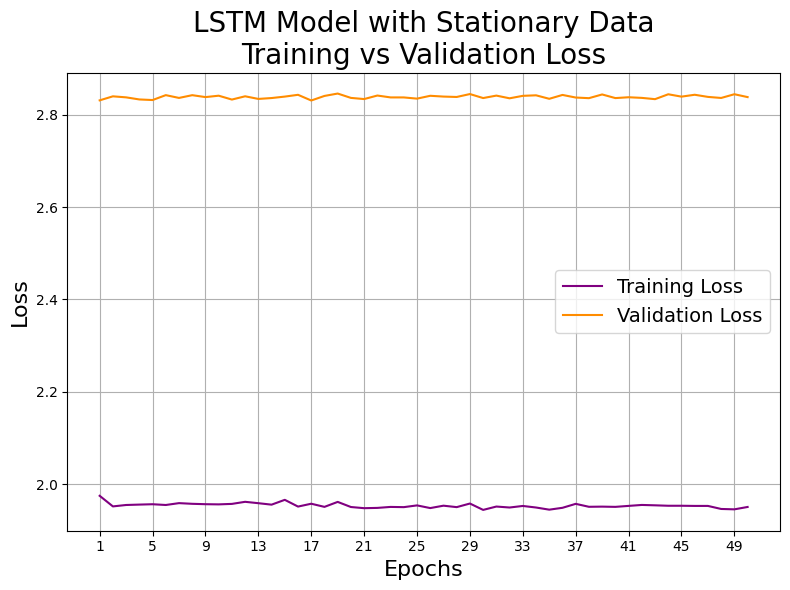

In [ ]:
# Importing packages needed
import matplotlib.pyplot as plt
import numpy as np

# Creating a figure with one subplot
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
epochs = 50

# Plotting loss against epochs on the subplot
axes.plot(lstm_training_loss_2, color="purple", label='Training Loss')
axes.plot(lstm_validation_loss_2, color="darkorange", label='Validation Loss')
axes.set_title('LSTM Model with Stationary Data\nTraining vs Validation Loss', fontsize=20)
axes.set_xlabel('Epochs', fontsize=16)
axes.set_ylabel('Loss', fontsize=16)
axes.legend(fontsize=14)
xticks = np.arange(0, epochs+1, 4)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks+1)
axes.grid(True)

# Plotting the plots
plt.tight_layout()
plt.show()

In [ ]:
# Importing packages needed
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculating RSME and MAPE metrics
train_val_split = len(apple_values)-test_size-1
lstm_error_2 = mean_absolute_percentage_error(apple_values[train_val_split:], lstm_predict_2)
lstm_rmse_2 = math.sqrt(mean_squared_error(apple_values[train_val_split:], lstm_predict_2))
print(lstm_error_2, lstm_rmse_2)

# Calculating correctly predicted days
lstm_day_count_2 = 0
for day in range(len(lstm_predict_2)):
  if apple_values[train_val_split + day] > apple_values[train_val_split + day-1] and lstm_predict_2[day] > lstm_predict_2[day - 1]:
    lstm_day_count_2 += 1
  elif apple_values[train_val_split + day] < apple_values[train_val_split + day-1] and lstm_predict_2[day] < lstm_predict_2[day - 1]:
    lstm_day_count_2 += 1
  elif apple_values[train_val_split + day] == apple_values[train_val_split + day-1] and lstm_predict_2[day] == lstm_predict_2[day - 1]:
    lstm_day_count_2 += 1

# Printing the calculated metrics
print(lstm_day_count_2/len(lstm_predict_2) * 100)

0.07611731198042561 16.6960866026561
53.68421052631579
